In [ ]:
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import re
from nltk.corpus import stopwords
import pandas as pd

def preprocess(raw_text):
    # Keep only words and remove punctuation
    cleaned_words = re.findall(r'\b\w+\b', raw_text.lower())

    # Remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = [w for w in cleaned_words if w not in stopword_set and w in model]

    return cleaned_words




def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))



In [ ]:
import pandas as pd
df = pd.read_csv('hackernews.csv')

In [ ]:
df

,Question,Manual Answer,Bot Answer,CONTEXT
0,Who were the suspected creators of the Stuxnet...,United States and Israel,The United States and Israel are widely believ...,NaN
1,What was the name of the ransomware used by FIN8?,White Rabbit ransomware,FIN8 has been detected using the White Rabbit ...,NaN
2,Which chips are affected by the ROCA attack?,The ROCA attack affects chips manufactured by ...,Chips manufactured by Infineon as early as 201...,NaN
3,Who were the victims of the cyber espionage op...,Victims included Members of the European Parli...,"Members of the European Parliament, Catalan Pr...",NaN
4,What versions of Junos OS are affected by the ...,All versions of Junos OS on SRX and EX Series,All versions of Junos OS on SRX and EX Series ...,NaN
...,...,...,...,...
94,When did the EleKtra-Leak campaign become active?,active since at least December 2020,The EleKtra-Leak campaign became active on Dec...,https://thehackernews.com/2023/10/elektra-leak...
95,What is the name of the ongoing campaign targe...,EleKtra-Leak.,The name of the campaign is EleKtra-Leak.,https://thehackernews.com/2023/10/elektra-leak...
96,Which web browsers are susceptible to the iLea...,orks against all third-party web browsers avai...,All third-party web browsers available for iOS...,https://thehackernews.com/2023/10/ileakage-new...
97,What optimization mechanism in modern CPUs for...,The iLeakage attack exploits the speculative d...,The iLeakage attack exploits the speculative d...,https://thehackernews.com/2023/10/ileakage-new...


In [ ]:
questions=df['Question'].to_list()

In [ ]:
answers=df['Manual Answer'].to_list()

In [ ]:
bot_answer=df['Bot Answer'].to_list()

In [ ]:
import numpy as np
from scipy import spatial
import gensim

# Load the word2vec model
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
index2word_set = model.index_to_key

def avg_feature_vector(sentence, model, num_features, index2word_set):
    if isinstance(sentence, str):
        words = sentence.split()
        feature_vec = np.zeros((num_features, ), dtype='float32')
        n_words = 0
        for word in words:
            if word in index2word_set:
                n_words += 1
                feature_vec = np.add(feature_vec, model[word])
        if n_words > 0:
            feature_vec = np.divide(feature_vec, n_words)
        return feature_vec
    else:
        # Handle non-string inputs
        return np.zeros((num_features, ), dtype='float32')

S1 = []
for i in range(len(answers)):
    sentence1 = answers[i]
    sentence2 = bot_answer[i]

    s1_afv = avg_feature_vector(sentence1, model=model, num_features=300, index2word_set=index2word_set)
    s2_afv = avg_feature_vector(sentence2, model=model, num_features=300, index2word_set=index2word_set)
    sim = 1 - spatial.distance.cosine(s1_afv, s2_afv)
    S1.append(sim)
    print(f"Sentence similarity between the sentences: {sim}")


Sentence similarity between the sentences: 0.6000210046768188
Sentence similarity between the sentences: 0.47343915700912476
Sentence similarity between the sentences: 0.7267463207244873
Sentence similarity between the sentences: 0.860619306564331
Sentence similarity between the sentences: 0.9117739796638489
Sentence similarity between the sentences: 0.48017027974128723
Sentence similarity between the sentences: 0.34997156262397766
Sentence similarity between the sentences: 0.9405574798583984


/usr/local/lib/python3.10/dist-packages/scipy/spatial/distance.py:636: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / np.sqrt(uu * vv)


Sentence similarity between the sentences: 1
Sentence similarity between the sentences: 1
Sentence similarity between the sentences: 1
Sentence similarity between the sentences: 0.5888892412185669
Sentence similarity between the sentences: 0.7756786942481995
Sentence similarity between the sentences: 0.7825103998184204
Sentence similarity between the sentences: 0.710149347782135
Sentence similarity between the sentences: 0.536613404750824
Sentence similarity between the sentences: 0.7787744998931885
Sentence similarity between the sentences: 0.7208654880523682
Sentence similarity between the sentences: 0.4543783366680145
Sentence similarity between the sentences: 0.8298583626747131
Sentence similarity between the sentences: 0.597665548324585
Sentence similarity between the sentences: 0.49012279510498047
Sentence similarity between the sentences: 0.4227844476699829
Sentence similarity between the sentences: 0.6620234847068787
Sentence similarity between the sentences: 0.4748212397098541

In [ ]:
df['S1'] = S1

In [ ]:
# Save the DataFrame to a new CSV file
df.to_csv('Word2vec_similarity_hacknews.csv', index=False)

In [ ]:
df

,Question,Manual Answer,Bot Answer,CONTEXT,S1
0,Who were the suspected creators of the Stuxnet...,United States and Israel,The United States and Israel are widely believ...,NaN,0.600021
1,What was the name of the ransomware used by FIN8?,White Rabbit ransomware,FIN8 has been detected using the White Rabbit ...,NaN,0.473439
2,Which chips are affected by the ROCA attack?,The ROCA attack affects chips manufactured by ...,Chips manufactured by Infineon as early as 201...,NaN,0.726746
3,Who were the victims of the cyber espionage op...,Victims included Members of the European Parli...,"Members of the European Parliament, Catalan Pr...",NaN,0.860619
4,What versions of Junos OS are affected by the ...,All versions of Junos OS on SRX and EX Series,All versions of Junos OS on SRX and EX Series ...,NaN,0.911774
...,...,...,...,...,...
94,When did the EleKtra-Leak campaign become active?,active since at least December 2020,The EleKtra-Leak campaign became active on Dec...,https://thehackernews.com/2023/10/elektra-leak...,0.682907
95,What is the name of the ongoing campaign targe...,EleKtra-Leak.,The name of the campaign is EleKtra-Leak.,https://thehackernews.com/2023/10/elektra-leak...,1.000000
96,Which web browsers are susceptible to the iLea...,orks against all third-party web browsers avai...,All third-party web browsers available for iOS...,https://thehackernews.com/2023/10/ileakage-new...,0.872114
97,What optimization mechanism in modern CPUs for...,The iLeakage attack exploits the speculative d...,The iLeakage attack exploits the speculative d...,https://thehackernews.com/2023/10/ileakage-new...,0.735494


In [ ]:
# import nltk
# nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# ss1 = 'The primary victims targeted in the Mirage campaign were organizations involved in the contest for rights to  survey natural gas and oil in the South China Sea, including a high profile oil company in the Philippines, a  military organization in Taiwan, an energy company in Canada, and organizations in Brazil, Israel, Egypt, and  Nigeria."'
# ss2 = 'The disclosed victims included a high-profile oil company in the Philippines, a military organization in Taiwan, an energy company in Canada, and other entities in Brazil, Israel, Egypt, and Nigeria.'

Word Embedding method with a cosine distance asses that our two sentences are similar to 95.91 %
None


<Axes: >

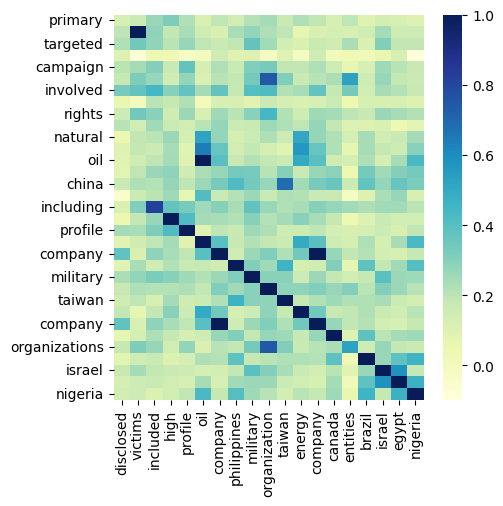

In [ ]:
# heat_map_matrix_between_two_sentences(ss1,ss2)